In [1]:
import pandas as pd
retail_dataframe = pd.read_excel("Online Retail.xlsx")
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [105]:
retail_dataframe.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [2]:
retail_dataframe.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [3]:
retail_dataframe.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
retail_dataframe.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
retail_dataframe.shape

(541909, 8)

In [6]:
retail_dataframe.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
#get total number of transcations, sale transcations and cancel/return transcations
total_trans = retail_dataframe.InvoiceNo.nunique()
cancelled_orders = retail_dataframe[retail_dataframe['InvoiceNo'].astype(str).str.startswith('C', na=False)]
cancelled_order_count = cancelled_orders.InvoiceNo.nunique()
sale_transactions_count = total_trans - cancelled_order_count

In [8]:
#Unique records for Invoice Id, StockCode, Customer ID and Country
print('Total number of Transactions: ', total_trans)
print('Number of Sale Transactions: ', sale_transactions_count)
print('Number of Cancel or Return Transactions: ',cancelled_order_count)
print('Percentage of Cancel or Return Transactions:',round((cancelled_order_count/total_trans)*100), '%')
print('Total number of distinct stock codes purchased or cancelled:', retail_dataframe.StockCode.nunique())
print('Total number Customers purchased or cancelled transcations with the retail chain:', retail_dataframe.CustomerID.nunique())
print('Total number of countries:', retail_dataframe.Country.nunique())
missing_cust_records = retail_dataframe.CustomerID.isnull().sum()
total_record_count = retail_dataframe.shape[0]
percent_missing_cust_records = (missing_cust_records / total_record_count) * 100
print('Total number of customer records missing', missing_cust_records)
print('Percentage of customer records missing',round(percent_missing_cust_records),'%')

Total number of Transactions:  25900
Number of Sale Transactions:  22064
Number of Cancel or Return Transactions:  3836
Percentage of Cancel or Return Transactions: 15 %
Total number of distinct stock codes purchased or cancelled: 4070
Total number Customers purchased or cancelled transcations with the retail chain: 4372
Total number of countries: 38
Total number of customer records missing 135080
Percentage of customer records missing 25.0 %


In [9]:
retail_dataframe.nsmallest(2,['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
retail_dataframe.nlargest(2,['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France


In [99]:
retail_dataframe[(retail_dataframe['Country']=='Unspecified') & (retail_dataframe['InvoiceNo'].astype('str').str.startswith('C', na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Exploratory Data Analysis (EDA)

1. Total number of records is 541909
2. Analysis on the data and its types This dataframe contains 8 variables that correspond to:
    - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    - Description: Product (item) name. Nominal.
    - Quantity: The quantities of each product (item) per transaction. Numeric.
    - InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
    - UnitPrice: Unit price. Numeric, Product price per unit in sterling.
    - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    - Country: Country name. Nominal, the name of the country where each customer resides.
3. There are 38 countries data in the retail dataset and includes one country tagged Unspecified, we need more information on this country.
4. 'Unspecified' country has contributed ONLY for purchases (2667 units of currency) and no return or cancelled transactions.
5. Description and Customer ID have null and empty values. There are 1454 empty records for Description and 135080 for Customer ID
6. Percentage of missing customer IDs is pretty significant (25%) and that could impact the results
7. There are negative quantity records, the negative quantity related to returned or cancelled items, the invoice No for return transactions start with C.
8. Dataset contains Sale and Return/Cancelled orders. Sale transactions are 22064 transactions and return/cancelled transactions are 3836
9. The data contains a year of transactional information from 2010-12-01 to 2011-12-09
10. Drop all null records (Description and CustomerID) and list the popular items
11. Use the StockCode to identify the popular item
12. There are about 15% of return or cancel transactions, we can do some study on the return transactions to identify items that have patterns in these transactions and help prevent future cancellations.

# Top Revenue generators

Drop Null and NaN from the purchase orders from the Description and CustomerID columns

In [11]:
purchase_orders_temp_df = retail_dataframe[retail_dataframe.index.isin(cancelled_orders.index) == False]
purchase_orders_df = purchase_orders_temp_df.dropna()
purchase_orders_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Purchase orders dataframe is sanitized and doesn't have any missing records

In [104]:
purchase_orders_df['Total_cost'] = purchase_orders_df['Quantity'] * purchase_orders_df['UnitPrice']
t=purchase_orders_df.groupby('Country').sum().sort_values(by="Total_cost").reset_index()
t[t['Country'] == 'Unspecified'][['Country', 'Total_cost']]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Total_cost
9,Unspecified,2667.07


Visualization of purchase and cancel/return patterns across countries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

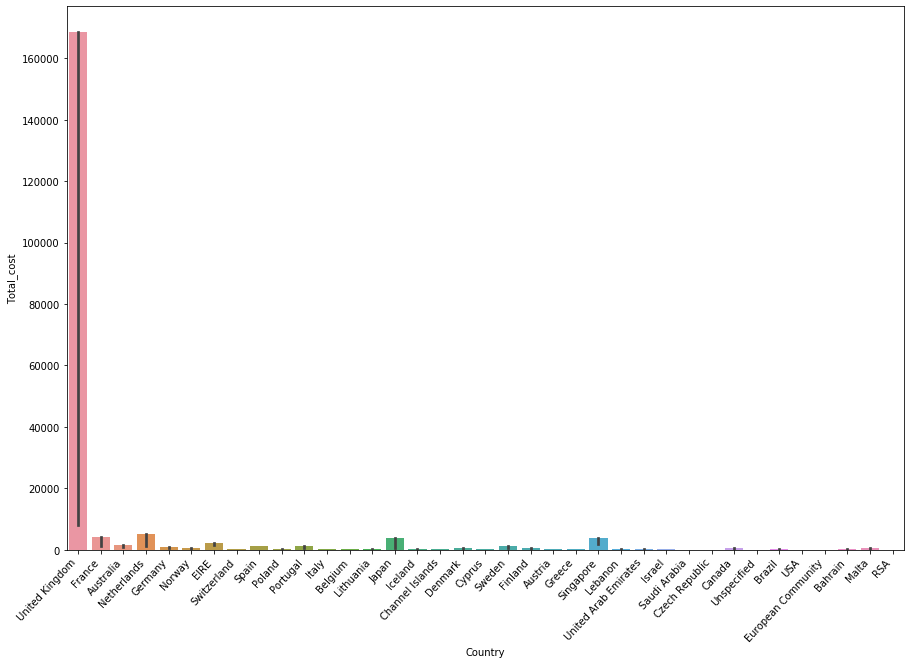

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax=sns.barplot(x='Country', y='Total_cost',data=purchase_orders_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [58]:
purchase_orders_df.groupby(['Country']).sum().sort_values(by="Total_cost", ascending=False)[['Quantity','Total_cost']].head(5)

,Quantity,Total_cost
Country,,
United Kingdom,4269472,7.308392e+06
Netherlands,200937,2.854463e+05
EIRE,140525,2.655459e+05
Germany,119263,2.288671e+05
France,111472,2.090240e+05


In [59]:
purchase_orders_df.groupby(['Country']).sum().sort_values(by="Total_cost", ascending=False)[['Quantity','Total_cost']].tail(5)

,Quantity,Total_cost
Country,,
Brazil,356,1143.60
RSA,352,1002.31
Czech Republic,671,826.74
Bahrain,260,548.40
Saudi Arabia,80,145.92


In [19]:
cancelled_orders.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     383
Country          0
dtype: int64

In [21]:
cancelled_orders.dropna(inplace = True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
cancelled_orders.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [31]:
cancelled_orders["Total_cost_returned_abs"] = abs(cancelled_orders['Quantity'] * cancelled_orders['UnitPrice'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


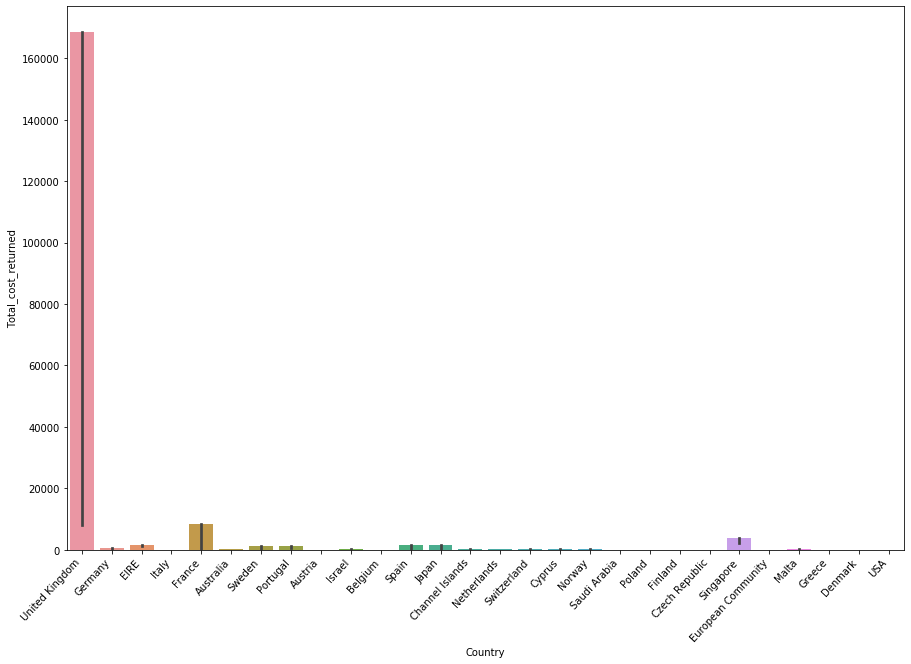

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax=sns.barplot(x='Country', y='Total_cost_returned',data=cancelled_orders,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [60]:
cancelled_orders.groupby(['Country']).sum().sort_values(by="Total_cost_returned_abs", ascending = False)[['Quantity', 'Total_cost_returned_abs']].head(5)

,Quantity,Total_cost_returned_abs
Country,,
United Kingdom,-260939,540518.16
EIRE,-4196,15260.68
France,-1624,12311.21
Singapore,-7,12158.90
Germany,-1815,7168.93


In [61]:
cancelled_orders.groupby(['Country']).sum().sort_values(by="Total_cost_returned_abs", ascending = False)[['Quantity', 'Total_cost_returned_abs']].tail(5)

,Quantity,Total_cost_returned_abs
Country,,
Czech Republic,-79,119.02
Greece,-1,50.00
Austria,-54,44.36
Saudi Arabia,-5,14.75
European Community,-2,8.50


In [55]:
cancelled_orders[cancelled_orders['Country'] == 'Singapore']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost_returned_abs
144830,C548830,M,Manual,-1,2011-04-04 13:08:00,162.60,12744.0,Singapore,162.60
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore,2382.92
144832,C548830,M,Manual,-1,2011-04-04 13:08:00,239.30,12744.0,Singapore,239.30
144833,C548830,M,Manual,-1,2011-04-04 13:08:00,1252.95,12744.0,Singapore,1252.95
144834,C548834,M,Manual,-1,2011-04-04 13:09:00,2053.07,12744.0,Singapore,2053.07
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744.0,Singapore,3949.32
406405,C571750,M,Manual,-1,2011-10-19 11:16:00,2118.74,12744.0,Singapore,2118.74


Observations - 
Purchase transactions:
    - United Kingdom and Netherlands have contributed as the top two revenue generators, while Saudi Arabia and Bahrain have contributed the least

Return/Cancel transactions:
    - United Kingdom, EIRE and France have the highest rate of returns or cancelled transcation amounts, while European COmmunity and Saudi Arabia have the least cancelled transcation amounts.
    - An interesting observation is Singapore had only 7 items each of quantity 1 returned and has the 4th highest return amount. These products have StockCode 'M' with description 'Manual', there seems to be something wrong here as the product codes arent available. Will need to examine these invoices more in detail. 

# Popular Items (Top 10)

List down the popular items sold in the country (input given by the user) during the time period Dec 2010 to Dec 2011

In [41]:
def popular_items(country):
    purchase_order_by_country_df = purchase_orders_df[purchase_orders_df['Country'] == country]
    purchase_g = purchase_order_by_country_df.groupby(['StockCode'])['Quantity'].sum().reset_index()
    purchase_g_sorted = purchase_g.sort_values("Quantity", ascending=False).reset_index().head(10)
    top_selling_stockcodes = purchase_g_sorted['StockCode'].head(10).tolist()
    stockcode_desc_df = purchase_orders_df[['StockCode', 'Description']]
    top_selling_temp_df=stockcode_desc_df[stockcode_desc_df['StockCode'].isin(top_selling_stockcodes)]
    top_selling_temp2_df=top_selling_temp_df.groupby(['StockCode', 'Description'])
    return top_selling_temp2_df.count()

In [42]:
top_10 = popular_items(input())
top_10

France


,
StockCode,Description
21086,SET/6 RED SPOTTY PAPER CUPS
21094,SET/6 RED SPOTTY PAPER PLATES
21212,PACK OF 72 RETROSPOT CAKE CASES
21731,RED TOADSTOOL LED NIGHT LIGHT
22492,MINI PAINT SET VINTAGE
22551,PLASTERS IN TIN SPACEBOY
22554,PLASTERS IN TIN WOODLAND ANIMALS
22556,PLASTERS IN TIN CIRCUS PARADE
23084,RABBIT NIGHT LIGHT


# Purchase trends

Compare the most commonly purchases items per country during Dec 2010 to Sept 2011 and Sept 2011 to Dec 2011.

In [44]:
#Divide the data into Training and Test sets.
#Training Data - Dec 01 2010 to Sep 01 2011
#Test Data - Sep 02 2011 to Dec 09 2011

train_df = purchase_orders_df[(purchase_orders_df['InvoiceDate'] > '2010-12-01') & (purchase_orders_df['InvoiceDate'] <= '2011-09-01')]
test_df = purchase_orders_df[(purchase_orders_df['InvoiceDate'] > '2011-09-01') & (purchase_orders_df['InvoiceDate'] <= '2011-12-10')]

In [45]:
def train_top_selling_items(country):
    train_purchase_order_by_country_df = train_df[train_df['Country'] == country]
    train_g = train_purchase_order_by_country_df.groupby(['StockCode'])['Quantity'].sum().reset_index()
    train_g_sorted = train_g.sort_values("Quantity", ascending=False).reset_index().head(10)
    train_top_selling_stockcodes = train_g_sorted['StockCode'].head(10).tolist()
    return train_top_selling_stockcodes

In [46]:
def test_top_selling_items(country):
    test_purchase_order_by_country_df = test_df[test_df['Country'] == country]
    test_g = test_purchase_order_by_country_df.groupby(['StockCode'])['Quantity'].sum().reset_index()
    test_g_sorted = test_g.sort_values("Quantity", ascending=False).reset_index().head(10)
    test_top_selling_stockcodes = test_g_sorted['StockCode'].head(10).tolist()
    return test_top_selling_stockcodes    

In [47]:
def matching_items(country, train_top_selling_stockcodes, test_top_selling_stockcodes):
    print(country,' - ', set(train_top_selling_stockcodes) & set(test_top_selling_stockcodes))

In [48]:
countries = retail_dataframe.Country.unique().tolist()

In [49]:
for country_name in countries:
    train_stocks = train_top_selling_items(country_name)
    test_stocks = test_top_selling_items(country_name)
    matching_items(country_name, train_stocks, test_stocks)

United Kingdom  -  {'85123A', '85099B', 84077, 84879, 22197}
France  -  {21731, 22492, 23084, 84879, 22551, 22554, 22556}
Australia  -  {21915, 22492}
Netherlands  -  {22326, 22629, 22630}
Germany  -  {'POST', 21212, 22326}
Norway  -  {22197}
EIRE  -  {84991, 22197, 22950, 21790}
Switzerland  -  {22554, 21212, 22326, 20719}
Spain  -  {84879, '84997D', 20728, '84997C'}
Poland  -  {37448, 22059}
Portugal  -  set()
Italy  -  {'51014A', '51014C'}
Belgium  -  {22417, 21212, 22630}
Lithuania  -  set()
Japan  -  set()
Iceland  -  {84992, '84558A', 21731, 22492}
Channel Islands  -  set()
Denmark  -  {22630}
Cyprus  -  {'85123A'}
Sweden  -  {22492, 84077}
Austria  -  set()
Israel  -  set()
Finland  -  {'84997D'}
Bahrain  -  set()
Greece  -  set()
Hong Kong  -  set()
Singapore  -  {22339, 22197, 22343}
Lebanon  -  set()
United Arab Emirates  -  set()
Saudi Arabia  -  set()
Czech Republic  -  set()
Canada  -  set()
Unspecified  -  set()
Brazil  -  set()
USA  -  set()
European Community  -  set()


Observations -
1. Can be seen that France and United Kingdom have a good purchase trend of items purchased during the 1st 3 quarters of 2011 and the last quarter of 2011. They have 7 and 5 items common in the two segments of purchase history.
2. There are lot of countries (Japan, Portugal, Greece, Israel, USA, Brazil, RSA, Austria,Hong Kong, Canada, Saudi Arabia) where there are no common items purchased during two segments of purchase history.